In [1]:
# Define Modules that we need in this project

import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns

from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.manifold               import LocallyLinearEmbedding
from sklearn.manifold               import Isomap
from sklearn.manifold               import TSNE
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.decomposition          import PCA
from sklearn.mixture                import GaussianMixture
from matplotlib.patches             import Ellipse

from imblearn.over_sampling         import SMOTE
from matplotlib.colors              import ListedColormap
from mpl_toolkits.mplot3d           import Axes3D
from sklearn.preprocessing          import StandardScaler
from mlxtend.plotting               import plot_decision_regions

In [2]:
df = pd.read_csv('dataset2.csv') # read from file
df = df.replace(-np.Inf, 0)      # remove infinity numbers -> one number infinite
df.head();                       # show 5 upper rows

In [3]:
ss = StandardScaler()                               
df.iloc[:, :-1] = ss.fit_transform(df.iloc[:, :-1]) # Normalize dataset for speed running

In [4]:
X = df.iloc[:, :-1] # assign data  to X
y = df.iloc[:, -1]  # assign lable to y

In [5]:
y = y.apply(['real_jungle', 'real_sea', 'real_mountain', 'fake_mountain', 'fake_jungle', 'fake_sea'].index) # label quantization

<font color="#00FF00"><h3><font color="#00FF00"><h3>$$LDA (Linear Discriminant Analysis)$$</h3></font></h3></font>

In [6]:
lda_1          = LinearDiscriminantAnalysis(n_components = 1)   # dimension reduction to 1
L1             = lda_1.fit_transform(X, y)

lda_2          = LinearDiscriminantAnalysis(n_components = 2)   # dimension reduction to 2
L2             = lda_2.fit_transform(X, y)

lda_3          = LinearDiscriminantAnalysis(n_components = 3)   # dimension reduction to 3
L3             = lda_3.fit_transform(X, y)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

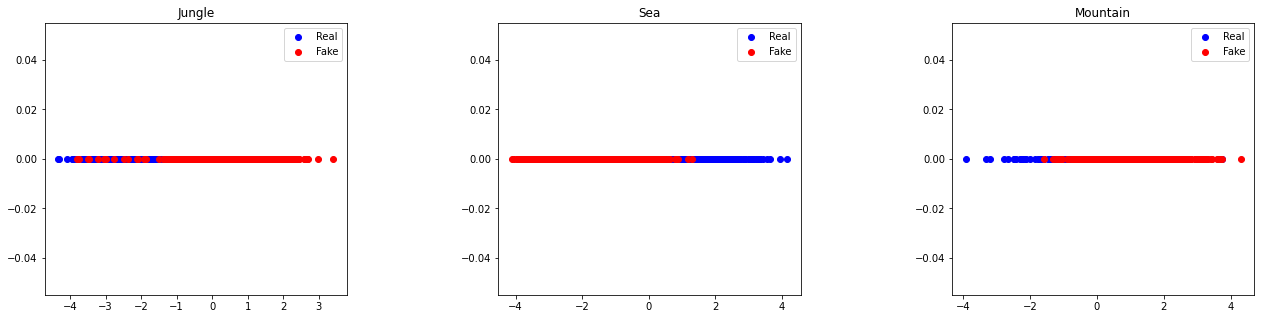

In [8]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 1)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(L1[np.where(y == t[0])], np.zeros_like(L1[np.where(y == t[0])]), c = 'b', label = 'Real')
    ax[i].scatter(L1[np.where(y == t[1])], np.zeros_like(L1[np.where(y == t[1])]), c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 2$$</h3></font></h3></font>

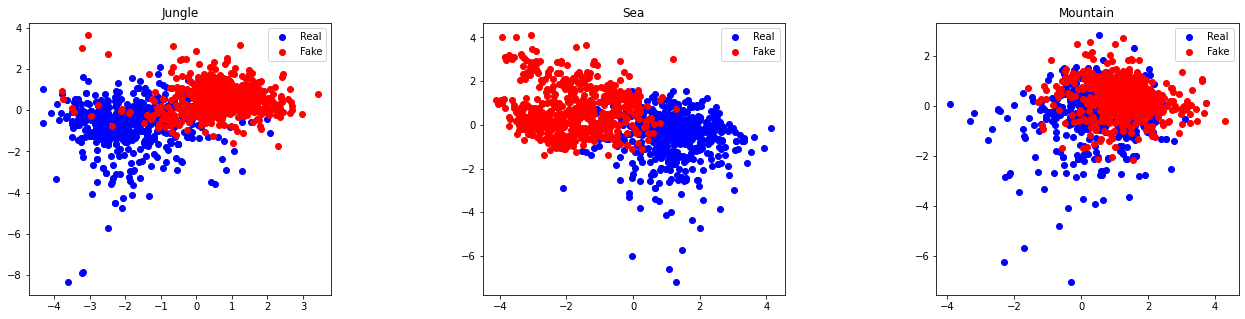

In [9]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 2)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(L2[np.where(y == t[0]), 0], L2[np.where(y == t[0]), 1], c = 'b', label = 'Real')
    ax[i].scatter(L2[np.where(y == t[1]), 0], L2[np.where(y == t[1]), 1], c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

In [31]:
def GM_plotting(n_components, X, title):
    # Fit the GMM model
    n_components = 2
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X)

    # Predict cluster labels for the data points
    labels = gmm.predict(X)

    # Plot the data points with color-coded clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=ListedColormap(list('br')), alpha=0.5)
    plt.title(f'Gaussian Mixture Model - {title}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the means of the Gaussian components
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', color='k', label='GMM Means', linewidths=2)

    # Plot the covariance ellipses for each Gaussian component
    for i , c in zip(range(n_components), list('br')):
        cov_matrix = gmm.covariances_[i]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
        width, height = 2 * np.sqrt(2) * np.sqrt(eigenvalues)
        ell = Ellipse(gmm.means_[i], width, height, angle * 180 / np.pi, alpha=0.4, edgecolor = 'k', linewidth = 2)
        ell.set_facecolor(c)
        plt.gca().add_patch(ell)

    plt.legend()
    plt.show()

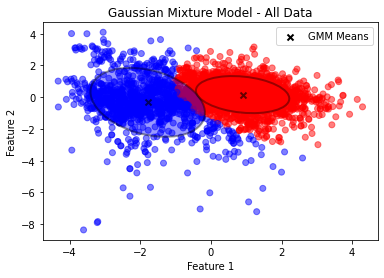

In [32]:
GM_plotting(2, L2, 'All Data') # Apply GMM Model to dataset for all data

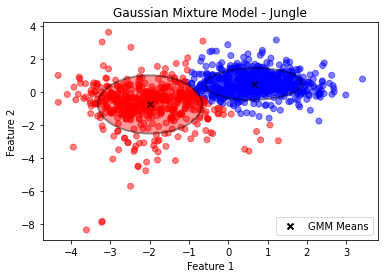

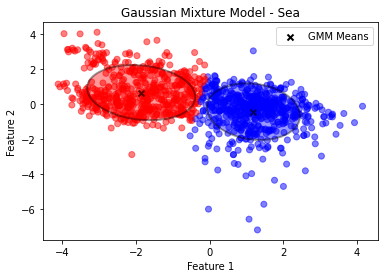

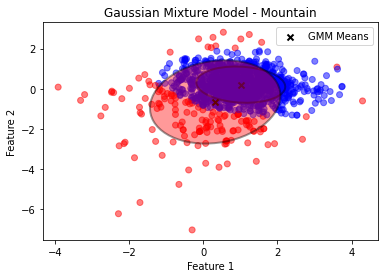

In [33]:
types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

# Apply GMM Model to dataset for real and fake images for three classes (Jungle, Sea, Mountain)
for t, title, i in zip(types, titles, range(len(titles))):
    a = np.where(y == t[0])[0].ravel()
    b = np.where(y == t[1])[0].ravel()
    c = np.concatenate([a, b])
    GM_plotting(n_components = 2, X = L2[c], title = title)
plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 3$$</h3></font></h3></font>

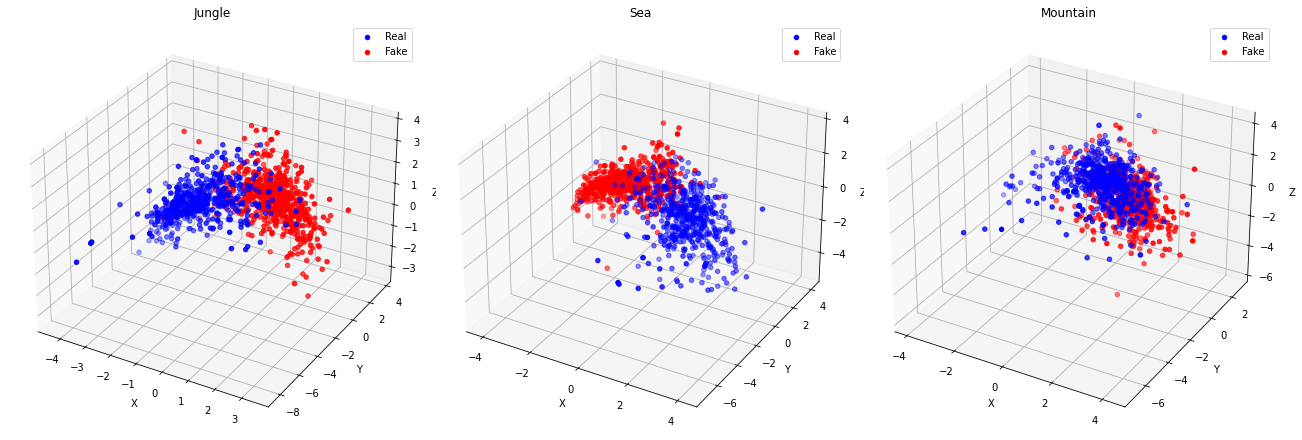

In [13]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# show fake and real images after LDA (Dimension Reduction 3)
for (i, ax), title, t in zip(enumerate(axs), titles, types):
    ax.scatter(L3[y == t[0], 0], L3[y == t[0], 1], L3[y == t[0], 2], c='b', marker='o', label = 'Real')
    ax.scatter(L3[y == t[1], 0], L3[y == t[1], 1], L3[y == t[1], 2], c='r', marker='o', label = 'Fake')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()

plt.show()

<font color="#00FF00"><h3><font color="#00FF00"><h3>$$PCA (Principle Component Analysis)$$</h3></font></h3></font>

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

In [14]:
pca_1          = PCA(n_components = 1)  # dimension reduction to 1
X_pca_1        = pca_1.fit_transform(X, y)

pca_2          = PCA(n_components = 2)  # dimension reduction to 2
X_pca_2        = pca_2.fit_transform(X, y)

pca_3          = PCA(n_components = 3)  # dimension reduction to 3
X_pca_3        = pca_3.fit_transform(X, y)

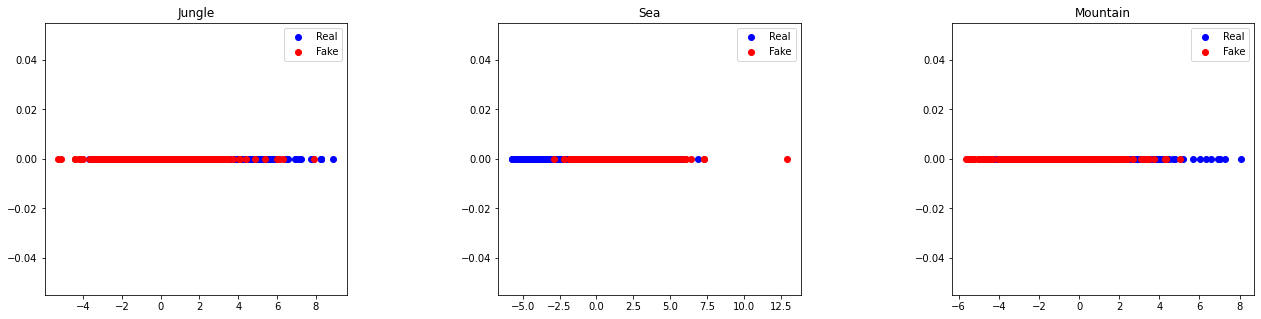

In [15]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 1)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_pca_1[np.where(y == t[0])], np.zeros_like(X_pca_1[np.where(y == t[0])]), c = 'b', label = 'Real')
    ax[i].scatter(X_pca_1[np.where(y == t[1])], np.zeros_like(X_pca_1[np.where(y == t[1])]), c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()


plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 2$$</h3></font></h3></font>

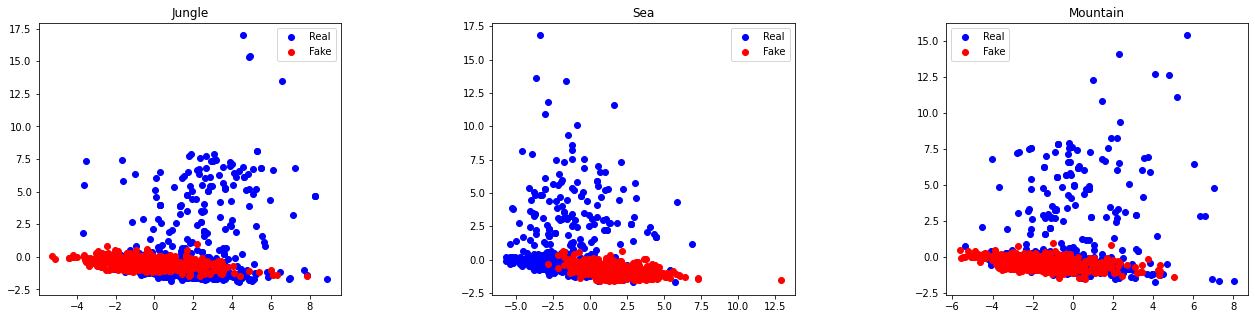

In [16]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 2)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_pca_2[np.where(y == t[0]), 0], X_pca_2[np.where(y == t[0]), 1], c = 'b', label = 'Real')
    ax[i].scatter(X_pca_2[np.where(y == t[1]), 0], X_pca_2[np.where(y == t[1]), 1], c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

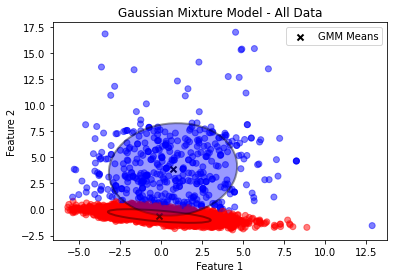

In [34]:
GM_plotting(2, X_pca_2, 'All Data') # Apply GMM Model to dataset for all data

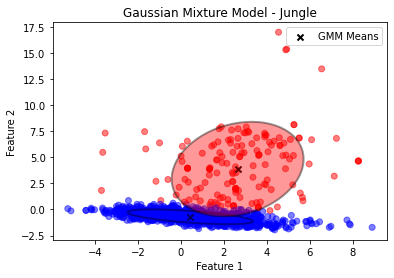

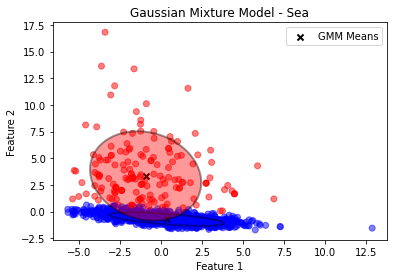

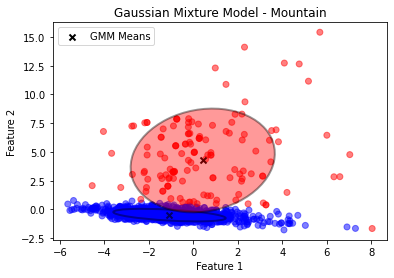

In [35]:
types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

# Apply GMM Model to dataset for real and fake images for three classes (Jungle, Sea, Mountain)
for t, title, i in zip(types, titles, range(len(titles))):
    a = np.where(y == t[0])[0].ravel()
    b = np.where(y == t[1])[0].ravel()
    c = np.concatenate([a, b])
    GM_plotting(n_components = 2, X = X_pca_2[c], title = title)
plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 3$$</h3></font></h3></font>

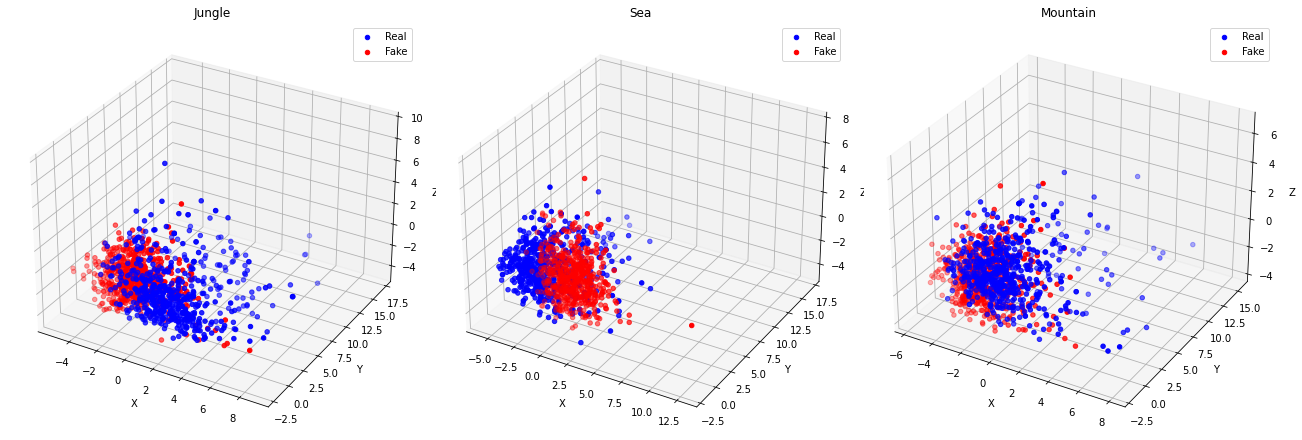

In [17]:
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle', 'Sea', 'Mountain']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# show fake and real images after LDA (Dimension Reduction 3)
for (i, ax), title, t in zip(enumerate(axs), titles, types):
    ax.scatter(X_pca_3[y == t[0], 0], X_pca_3[y == t[0], 1], X_pca_3[y == t[0], 2], c='b', marker='o', label = 'Real')
    ax.scatter(X_pca_3[y == t[1], 0], X_pca_3[y == t[1], 1], X_pca_3[y == t[1], 2], c='r', marker='o', label = 'Fake')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()

plt.show()

<font color="#00FF00"><h2><font color="#00FF00"><h2>$$t-SNE$$</h2></font></h2></font>

In [18]:
tsne_1   = TSNE(n_components=1, random_state=42)    # dimension reduction to 1
X_tsne_1 = tsne_1.fit_transform(X)

tsne_2   = TSNE(n_components=2, random_state=42)    # dimension reduction to 2
X_tsne_2 = tsne_2.fit_transform(X)

tsne_3   = TSNE(n_components=3, random_state=42)    # dimension reduction to 3
X_tsne_3 = tsne_3.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

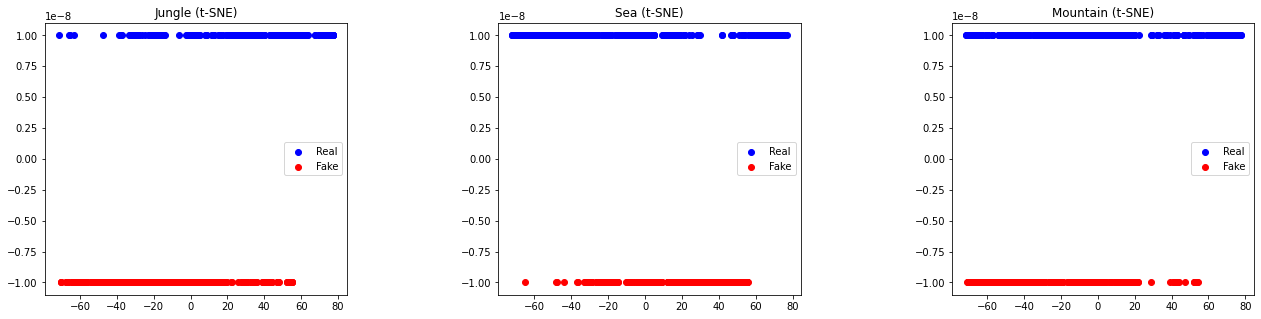

In [46]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (t-SNE)', 'Sea (t-SNE)', 'Mountain (t-SNE)']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 1)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_tsne_1[np.where(y == t[0]), 0], np.zeros_like(X_tsne_1[np.where(y == t[0])]) + 1e-8, c = 'b', label = 'Real')
    ax[i].scatter(X_tsne_1[np.where(y == t[1]), 0], np.zeros_like(X_tsne_1[np.where(y == t[1])]) - 1e-8, c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 2$$</h3></font></h3></font>

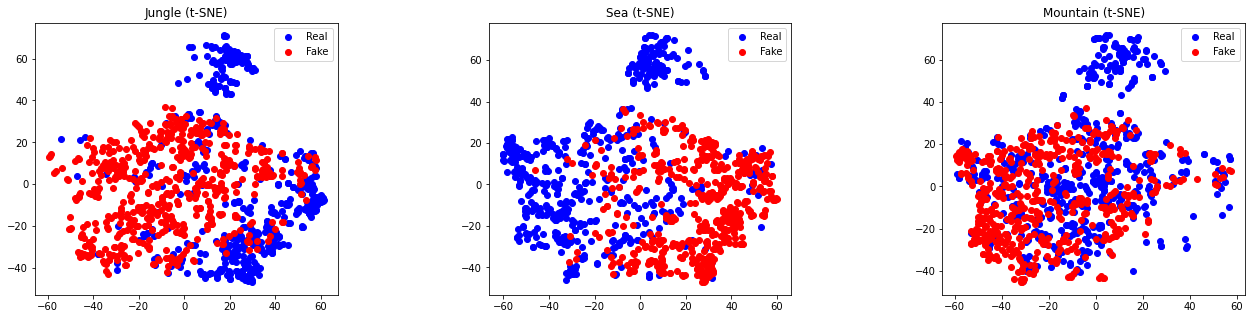

In [47]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (t-SNE)', 'Sea (t-SNE)', 'Mountain (t-SNE)']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 2)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_tsne_2[np.where(y == t[0]), 0], X_tsne_2[np.where(y == t[0]), 1], c = 'b', label = 'Real')
    ax[i].scatter(X_tsne_2[np.where(y == t[1]), 0], X_tsne_2[np.where(y == t[1]), 1], c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

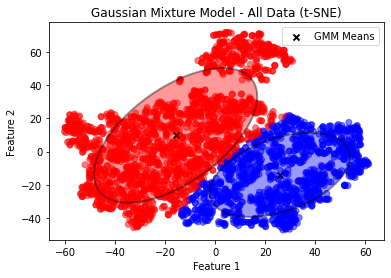

In [48]:
GM_plotting(2, X_tsne_2, 'All Data (t-SNE)')    # Apply GMM Model to dataset for all data

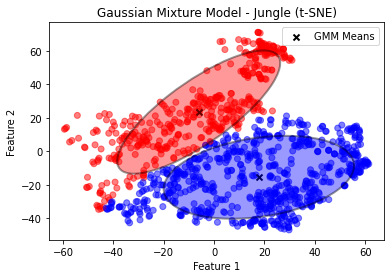

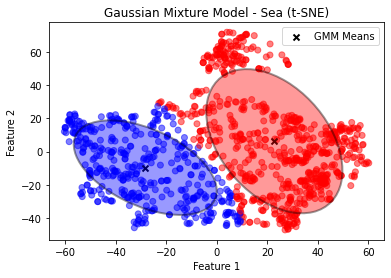

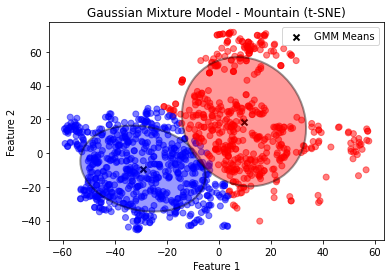

In [49]:
types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

# Apply GMM Model to dataset for real and fake images for three classes (Jungle, Sea, Mountain)
for t, title, i in zip(types, titles, range(len(titles))):
    a = np.where(y == t[0])[0].ravel()
    b = np.where(y == t[1])[0].ravel()
    c = np.concatenate([a, b])
    GM_plotting(n_components = 2, X = X_tsne_2[c], title = title)
plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 3$$</h3></font></h3></font>

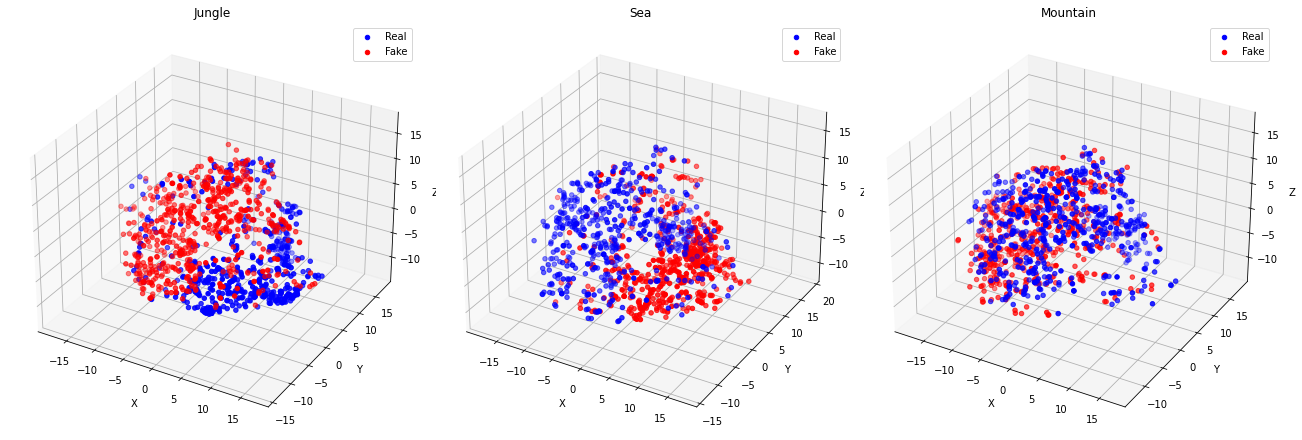

In [21]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (t-SNE)', 'Sea (t-SNE)', 'Mountain (t-SNE)']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# show fake and real images after LDA (Dimension Reduction 3)
for (i, ax), title, t in zip(enumerate(axs), titles, types):
    ax.scatter(X_tsne_3[np.where(y == t[0]), 0], X_tsne_3[np.where(y == t[0]), 1], X_tsne_3[np.where(y == t[0]), 2], c='b', marker='o', label = 'Real')
    ax.scatter(X_tsne_3[np.where(y == t[1]), 0], X_tsne_3[np.where(y == t[1]), 1], X_tsne_3[np.where(y == t[1]), 2], c='r', marker='o', label = 'Fake')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()

plt.show()

<font color="#00FF00"><h2><font color="#00FF00"><h2>$$Isomap$$</h2></font></h2></font>

In [22]:
%%capture
isomap_1 = Isomap(n_components=1, n_neighbors=5)    # dimension reduction to 1
isomap_1 = isomap_1.fit_transform(X)

isomap_2 = Isomap(n_components=2, n_neighbors=5)    # dimension reduction to 2
isomap_2 = isomap_2.fit_transform(X)

isomap_3 = Isomap(n_components=3, n_neighbors=5)    # dimension reduction to 3
isomap_3 = isomap_3.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

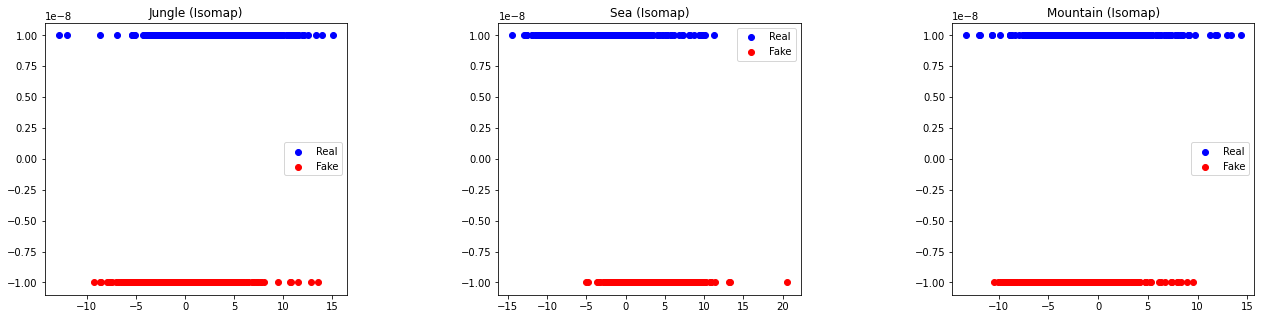

In [50]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (Isomap)', 'Sea (Isomap)', 'Mountain (Isomap)']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)


# show fake and real images after LDA (Dimension Reduction 1)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(isomap_1[np.where(y == t[0]), 0], np.zeros_like(isomap_1[np.where(y == t[0])]) + 1e-8, c = 'b', label = 'Real')
    ax[i].scatter(isomap_1[np.where(y == t[1]), 0], np.zeros_like(isomap_1[np.where(y == t[1])]) - 1e-8, c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 2$$</h3></font></h3></font>

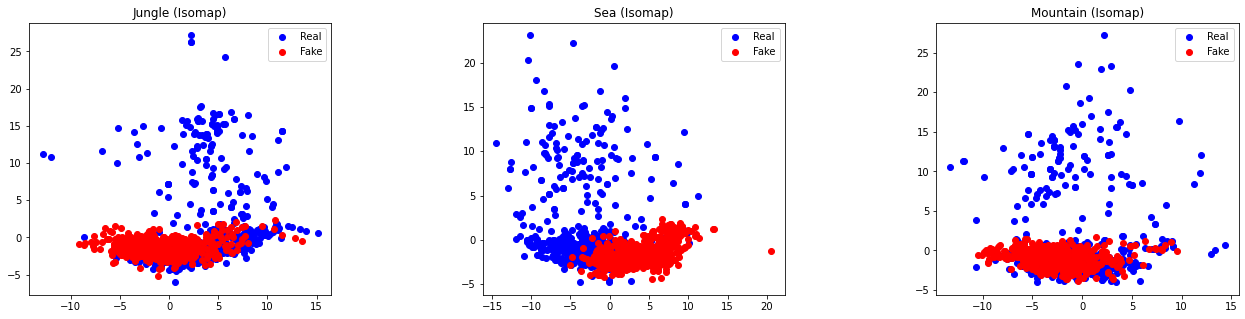

In [52]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (Isomap)', 'Sea (Isomap)', 'Mountain (Isomap)']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)


# show fake and real images after LDA (Dimension Reduction 2)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(isomap_2[np.where(y == t[0]), 0], isomap_2[np.where(y == t[0]), 1], c = 'b', label = 'Real')
    ax[i].scatter(isomap_2[np.where(y == t[1]), 0], isomap_2[np.where(y == t[1]), 1], c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

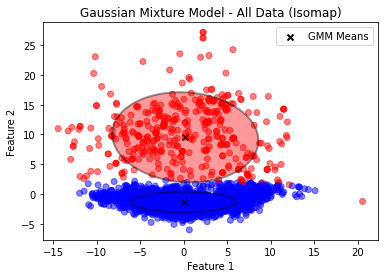

In [53]:
GM_plotting(2, isomap_2, 'All Data (Isomap)')    # Apply GMM Model to dataset for all data

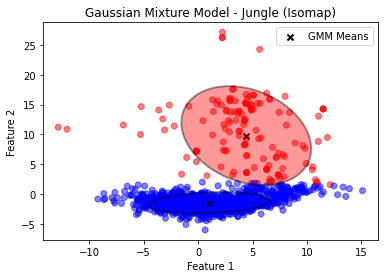

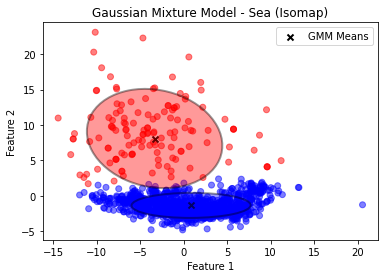

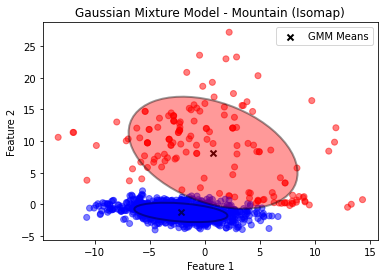

In [54]:
types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (Isomap)', 'Sea (Isomap)', 'Mountain (Isomap)']

# Apply GMM Model to dataset for real and fake images for three classes (Jungle, Sea, Mountain)
for t, title, i in zip(types, titles, range(len(titles))):
    a = np.where(y == t[0])[0].ravel()
    b = np.where(y == t[1])[0].ravel()
    c = np.concatenate([a, b])
    GM_plotting(n_components = 2, X = isomap_2[c], title = title)
plt.show()


<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 3$$</h3></font></h3></font>

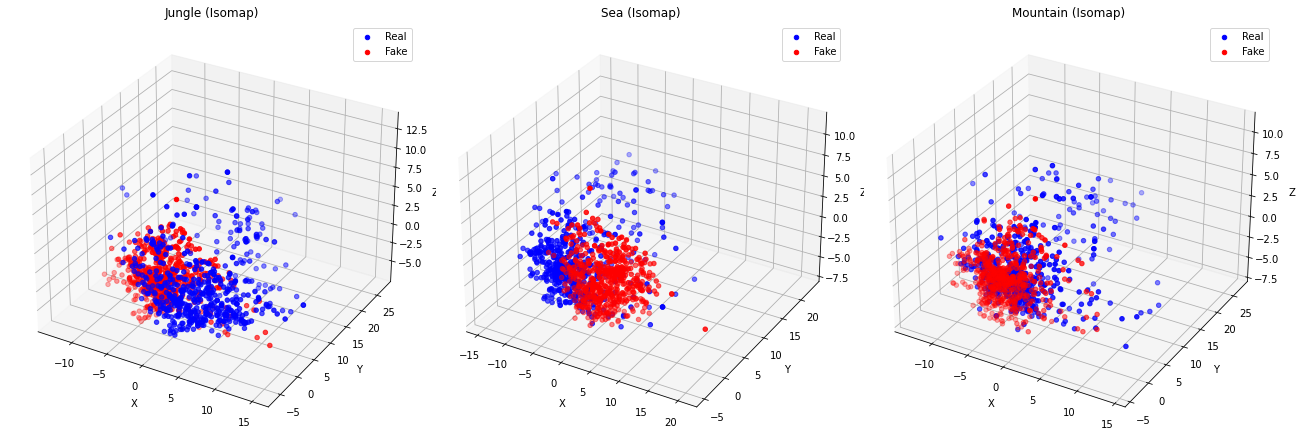

In [51]:
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (Isomap)', 'Sea (Isomap)', 'Mountain (Isomap)']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# show fake and real images after LDA (Dimension Reduction 3)
for (i, ax), title, t in zip(enumerate(axs), titles, types):
    ax.scatter(isomap_3[np.where(y == t[0]), 0], isomap_3[np.where(y == t[0]), 1], isomap_3[np.where(y == t[0]), 2], c='b', marker='o', label = 'Real')
    ax.scatter(isomap_3[np.where(y == t[1]), 0], isomap_3[np.where(y == t[1]), 1], isomap_3[np.where(y == t[1]), 2], c='r', marker='o', label = 'Fake')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()

plt.show()

<font color="#00FF00"><h3><font color="#00FF00"><h3>$$(LLE) Locally Linear Embedding$$</h3></font></h3></font>

In [26]:
lle_1   = LocallyLinearEmbedding(n_components=1, n_neighbors=5) # dimension reduction to 1
X_lle_1 = lle_1.fit_transform(X)

lle_2   = LocallyLinearEmbedding(n_components=2, n_neighbors=5) # dimension reduction to 2
X_lle_2 = lle_2.fit_transform(X)

lle_3   = LocallyLinearEmbedding(n_components=3, n_neighbors=5) # dimension reduction to 3
X_lle_3 = lle_3.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

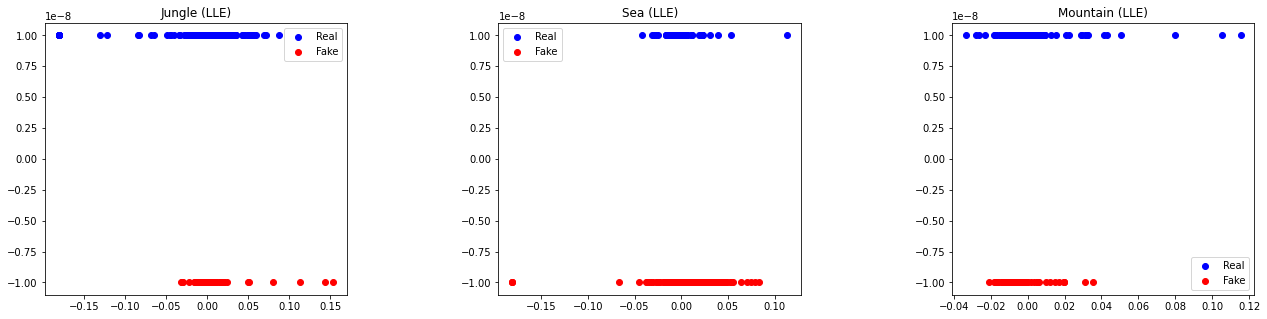

In [55]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (LLE)', 'Sea (LLE)', 'Mountain (LLE)']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 1)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_lle_1[np.where(y == t[0]), 0], np.zeros_like(X_lle_1[np.where(y == t[0])]) + 1e-8, c = 'b', label = 'Real')
    ax[i].scatter(X_lle_1[np.where(y == t[1]), 0], np.zeros_like(X_lle_1[np.where(y == t[1])]) - 1e-8, c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 2$$</h3></font></h3></font>

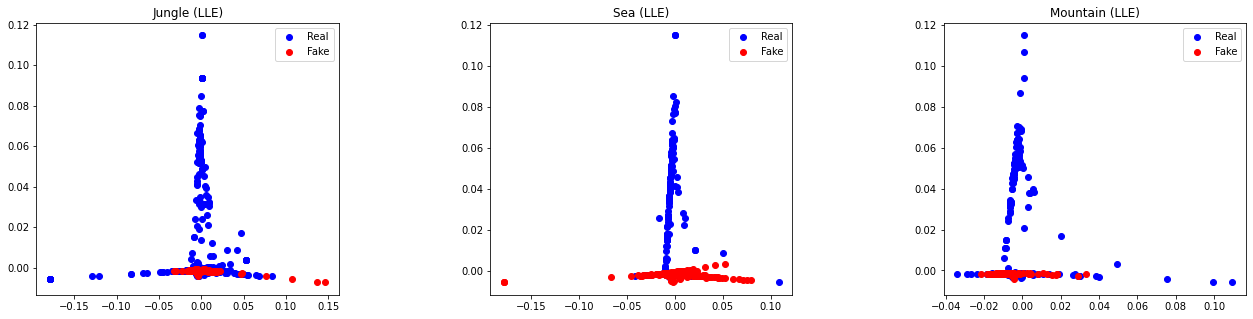

In [56]:
'''
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]
'''

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (LLE)', 'Sea (LLE)', 'Mountain (LLE)']

color_palette = ['red', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.5)

# show fake and real images after LDA (Dimension Reduction 2)
for t, title, i in zip(types, titles, range(len(titles))):
    ax[i].scatter(X_lle_2[np.where(y == t[0]), 0], X_lle_2[np.where(y == t[0]), 1], c = 'b', label = 'Real')
    ax[i].scatter(X_lle_2[np.where(y == t[1]), 0], X_lle_2[np.where(y == t[1]), 1], c = 'r', label = 'Fake')
    ax[i].set_title(title)
    ax[i].legend()

plt.show()

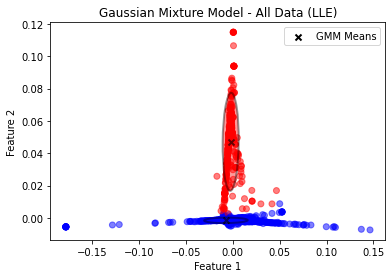

In [57]:
GM_plotting(2, X_lle_2, 'All Data (LLE)') # Apply GMM Model to dataset for all data

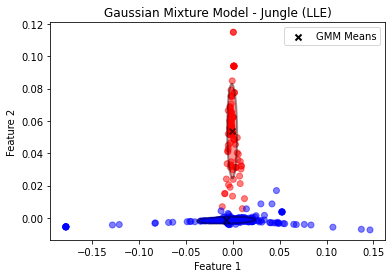

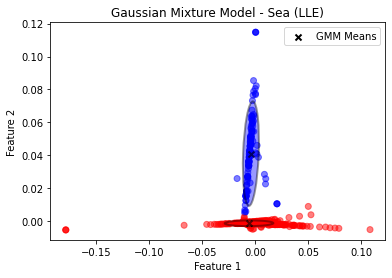

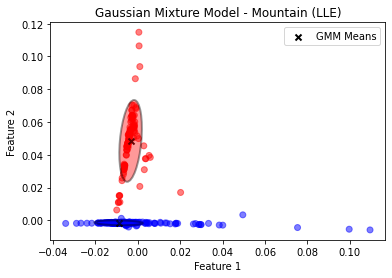

In [58]:
types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (LLE)', 'Sea (LLE)', 'Mountain (LLE)']

# Apply GMM Model to dataset for real and fake images for three classes (Jungle, Sea, Mountain)
for t, title, i in zip(types, titles, range(len(titles))):
    a = np.where(y == t[0])[0].ravel()
    b = np.where(y == t[1])[0].ravel()
    c = np.concatenate([a, b])
    GM_plotting(n_components = 2, X = X_lle_2[c], title = title)
plt.show()

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 3$$</h3></font></h3></font>

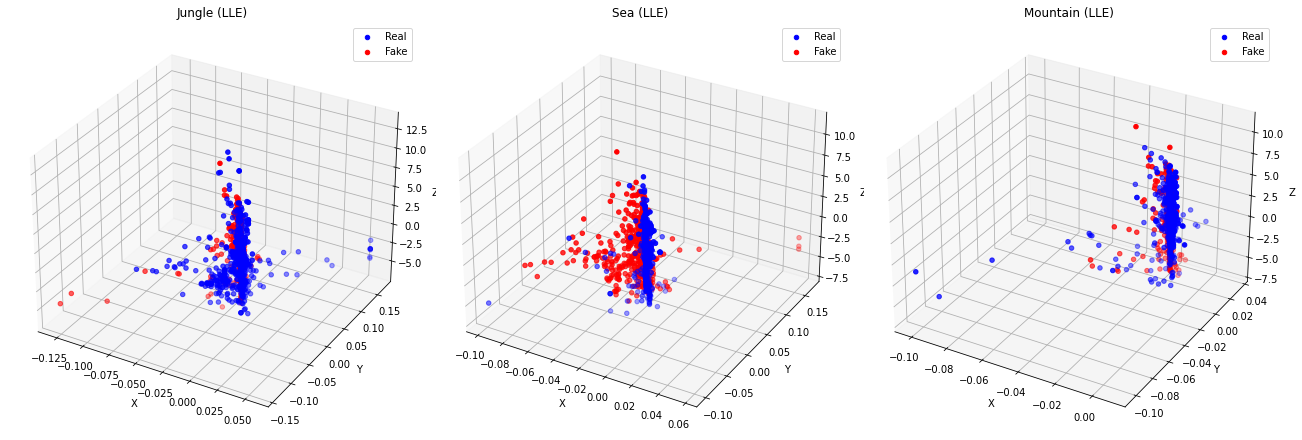

In [59]:
types         = [['real_jungle'  , 'fake_jungle'  ], 
                 ['real_sea'     , 'fake_sea'     ], 
                 ['real_mountain', 'fake_mountain']]

types         = [[0, 3], 
                 [1, 4], 
                 [2, 5]]

titles        = ['Jungle (LLE)', 'Sea (LLE)', 'Mountain (LLE)']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# show fake and real images after LDA (Dimension Reduction 3)
for (i, ax), title, t in zip(enumerate(axs), titles, types):
    ax.scatter(X_lle_3[np.where(y == t[0]), 0], X_lle_3[np.where(y == t[0]), 1], isomap_3[np.where(y == t[0]), 2], c='b', marker='o', label = 'Real')
    ax.scatter(X_lle_3[np.where(y == t[1]), 0], X_lle_3[np.where(y == t[1]), 1], isomap_3[np.where(y == t[1]), 2], c='r', marker='o', label = 'Fake')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()

plt.show()